# S2S Skill

What was the forecast skill of S2S models? 
Did grid-cell or spatial bias correction schemes improve results?

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import paraguayfloodspy.visualize as viz # custom plotting library

Define parameters

In [2]:
%matplotlib inline
savefigs = True

Define the models to use.

In [3]:
forecasts = ['Raw', 'XLR', 'PCR', 'CCA']
models = forecasts.copy(); models.remove('Raw')

Identify where there was actually an observed occurrence of 90th percentile exceedance

In [4]:
obs_url = 'http://iridl.ldeo.columbia.edu/home/.agmunoz/.Paraguay/.Obs/.Obsrain_90thpctl/dods'
obs_exceed = xr.open_dataarray(obs_url)
obs_exceed = obs_exceed.isel(T=(obs_exceed['T'].size - 1))
hatch0 = np.ma.masked_invalid(obs_exceed.values)
hatch = np.ma.masked_less(hatch0, 0.9)
Xh, Yh = np.meshgrid(obs_exceed.X, obs_exceed.Y)

Define the plot

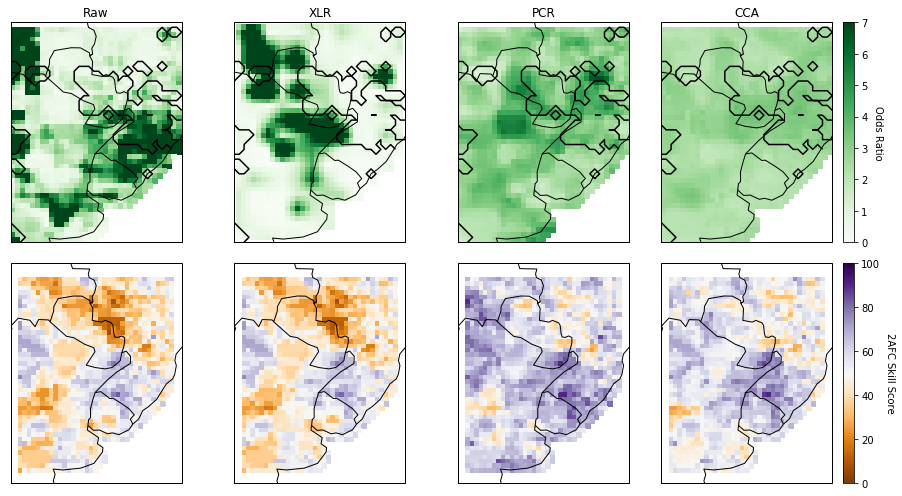

In [5]:
ncols = len(forecasts)
fig, axes = viz.SetupAxes(ncol = ncols, nax = 2*len(forecasts), proj = ccrs.PlateCarree(), figsize = [13, 7])
for i,m in enumerate(forecasts):
    # First plot the forecast for December 1-7 2015
    ax = axes[0, i]
    url = 'http://iridl.ldeo.columbia.edu/ds%3A/home/.agmunoz/.Paraguay/.{}/.Odds_1-7Dec2015/dods'.format(m)
    ds = xr.open_dataarray(url)
    X,Y = np.meshgrid(ds.X, ds.Y)
    sub = ds.values
    sub = np.ma.masked_invalid(sub)
    sub = np.ma.masked_less(sub, 0)
    if len(sub.shape) == 3:
        sub = sub[0,:,:]
    C1 = ax.pcolormesh(X, Y, sub, cmap="Greens", transform=ccrs.PlateCarree(), vmin=0, vmax=7)
    ax.contour(Xh, Yh, hatch0, levels = [-100, 0, 100], colors='black', size=1.5)
    ax.set_title(m)
    if i == (ncols - 1):
        cbar1 = fig.colorbar(C1, ax = ax)
        cbar1.set_label('Odds Ratio', rotation=270)
        cbar1.ax.get_yaxis().labelpad = 15
    # Next plot the 2AFC Skill Score
    ax = axes[1, i]
    url = 'http://iridl.ldeo.columbia.edu/home/.agmunoz/.Paraguay/.{}/.2AFCProbFcsts/dods'.format(m)
    ds = xr.open_dataarray(url)
    X,Y = np.meshgrid(ds.X, ds.Y)
    sub = ds.values
    sub = np.ma.masked_invalid(sub)
    sub = np.ma.masked_greater(sub, 100)
    sub = np.ma.masked_less(sub, 0)
    if len(sub.shape) == 3:
        sub = sub[0,:,:]
    C2 = ax.pcolormesh(X, Y, sub, cmap="PuOr", transform=ccrs.PlateCarree(), vmin=0, vmax=100)
    if i == (ncols - 1):
        cbar2 = fig.colorbar(C2, ax = ax)
        cbar2.set_label('2AFC Skill Score', rotation=270)
        cbar2.ax.get_yaxis().labelpad = 15
viz.FormatAxes(axes, coast=True, grid=False, border=True, river = False, feature_list = [], 
               states=False, extent = None, ticks=None)
if savefigs:
    fig.savefig("../_figs/ForecastSkill.pdf", bbox_inches="tight")